In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
import seaborn as sns
import pandas as pd
from matplotlib import rcParams
from scipy.special import lambertw
from scipy.stats import gennorm
from scipy.special import gamma
from scipy.integrate import quad
import matplotlib.ticker as ticker

def calc_harmonic(n):
    return sum(1/d for d in range(1, n + 1))

In [63]:
ns = 120  #12
nd = 200  #20
s=0.1

########################################################

#Fig 6: ns=120 & nd=200
folder = 'dataRandom/mean01ns120nd200_exp'
#folder = 'dataRandom/meanS008D01ns120nd200_exp'
#folder = 'dataRandom/meanS01D008ns120nd200_exp'


#Fig S9: ns=12 & nd=20
#folder = 'dataRandom/mean01ns12nd20_exp'
#folder = 'dataRandom/meanS01D005ns12nd20_exp'
#folder = 'dataRandom/meanS005D01ns12nd20_exp'


#Fig S8: ns=120 & nd=200 with Pareto distribution
#folder = 'dataRandom/mean01shape25ns120nd200_pareto'
#folder = 'dataRandom/meanS01D008shape25ns120nd200_pareto'
#folder = 'dataRandom/meanS008D01shape25ns120nd200_pareto'


########################################################



ris0 = []
ris = []
f = []

for sfile in sorted(glob.glob(folder+'/*ris.npy')):
    result = re.search(''+folder+'/(.*)_', sfile)
    seed = result.group(1)
    ris.append(np.load(folder+"/"+seed+"_ris.npy"))
    ris0.append(np.load(folder+"/"+seed+"_ris0.npy"))
    f.append(np.load(folder+"/"+seed+"_fit.npy"))

x = np.load(glob.glob(folder+'/*MS.npy')[0])
ris = np.array(ris)
ris0 = np.array(ris0)
f = np.array(f)

print("ris.shape", ris.shape)


landscapes = ris.shape[0]



alpha = 4*10**(-3)
mus = 10**(-10)
mud = 10**(-10)*alpha
mus=mus*3*0.76
mud=mud*3*0.99*0.52
U = ns*mus/5.80 + nd*mud/9.63
Us = ns*mus/5.80

fractionAAlevel = mud/9.63*nd/(mud/9.63*nd+mus/5.80*ns)

print("mus",mus)
print("fractionAAlevel", fractionAAlevel)

Avg_meanline = 0

for i in range(landscapes):
    w_SN = np.random.exponential(scale=0.1, size=ns)
    w_DN = np.random.exponential(scale=0.1, size=nd)
    meanSNB=np.mean(w_SN)
    meanDNB=np.mean(w_DN)
    meanline = fractionAAlevel*2*meanDNB/(fractionAAlevel*2*meanDNB+(1-fractionAAlevel)*2*meanSNB)

    Avg_meanline += meanline

fraction_of_time_a_AAsub_only_due_to_doubles =Avg_meanline/landscapes
print("Mean fraction", fraction_of_time_a_AAsub_only_due_to_doubles)
print("ris[:,:,ns+1:].sum(axis=2).mean(axis=0)[0]", ris[:,:,ns+1:].sum(axis=2).mean(axis=0)[0])


N_list = []
for i in range(len(x)):
    ms = x[i]
    N = np.floor(ms/U)
    N_list.append(N) 
N_list = np.array(N_list)


ΔW_SD = []
ΔW_S = []

for j in range(ris.shape[1]):
    R = ris[:,j,:]
    ΔW_SD.append(((f-1.) * R).sum(axis=1).mean())
    
    R = ris0[:,j,:]
    ΔW_S.append(((f[:,:ns+1]-1.) * R).sum(axis=1).mean())
    
ΔW_SD = np.array(ΔW_SD)
ΔW_S = np.array(ΔW_S)
y= (ΔW_SD-ΔW_S)/ΔW_S

ris.shape (993, 60, 321)
mus 2.2800000000000001e-10
fractionAAlevel 0.0027124129355999786
Mean fraction 0.002725571638186736
ris[:,:,ns+1:].sum(axis=2).mean(axis=0)[0] 0.0027384501510573974


# ns=12, nd=20 with exponential distribution

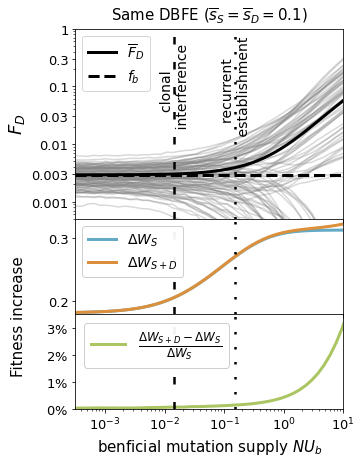

In [9]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.8, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1,1]})#, hspace=0.2, wspace=0.2))


# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii > 500 and ii <=600:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


# Add text at the vertical line
axes[0].text(np.real(epsilon/(4*lambertw(epsilon/(4*U))))+0.0006, 0.095, 'clonal \n interference', rotation=90, verticalalignment='center', horizontalalignment='center', multialignment='center', fontsize=14)
axes[0].text(np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))+0.005, 0.095, 'recurrent \n establishment', rotation=90, verticalalignment='center', horizontalalignment='center', multialignment='center', fontsize=14)

axes[0].set_ylabel('$F_D$', fontsize=18)
axes[0].set_title('Same DBFE ($\\overline{s}_S=\overline{s}_D=0.1$)', fontsize=15,pad=8)

axes[0].set_ylim(0.0005,1)
axes[0].set_yscale("log")

axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3,1]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3,1], fontsize=13)

axes[0].legend(fontsize=14, loc=0)


##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.18,0.33)


axes[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
legend = axes[1].legend(fontsize=14, loc=2)
legend.get_frame().set_alpha(0.95)


##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

axes[2].set_ylim(0.0001,0.035)
#axes[2].set_yscale("log")


axes[2].set_yticks([0.0,0.01,0.02, 0.03])
axes[2].set_yticklabels(["$0 \\%$","$1 \\%$","$2 \\%$", "$3 \\%$"], fontsize=13)

legend = axes[2].legend(fontsize=17)
legend.get_frame().set_alpha(0.95)



axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.5),10)
axes[2].set_xscale("log")

fig.text(-0.06, 0.31, 'Fitness increase', va='center', rotation='vertical', fontsize=15)


plt.tick_params(axis="x", labelsize=13) 


handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

    


plt.savefig("FD_W_12_sigma01.pdf", bbox_inches='tight')

plt.show()

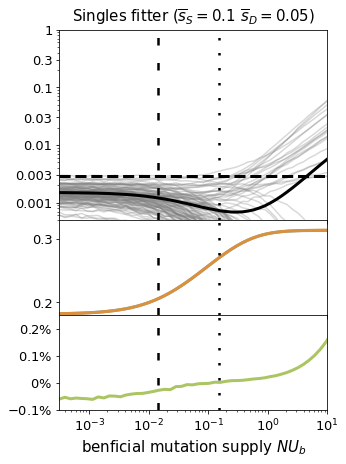

In [16]:
# Create two subplots sharing y axis
#fig, axes = plt.subplots(3, figsize=(5.2, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1,1]})#, hspace=0.2, wspace=0.2))
fig, axes = plt.subplots(3, figsize=(4.8, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1,1]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii > 500 and ii <=600:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)



axes[0].set_title('Singles fitter ($\\overline{s}_S=0.1\,\,\overline{s}_D=0.05$)', fontsize=15,pad=8)


axes[0].set_ylim(0.0005,1)
axes[0].set_yscale("log")



axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3,1]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3,1], fontsize=13)



##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.18,0.33)



axes[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

axes[2].set_ylim(-0.001,0.0025)
axes[2].set_yticks([-0.001,0.0,0.001, 0.002])
axes[2].set_yticklabels(["$-0.1 \\%$","$0 \\%$","$0.1 \\%$", "$0.2 \\%$"], fontsize=13)



axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.5),10)
axes[2].set_xscale("log")


plt.tick_params(axis="x", labelsize=13) 


handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

    

#plt.savefig("FD_W_12_sS01_sD005.pdf", bbox_inches='tight')

plt.show()

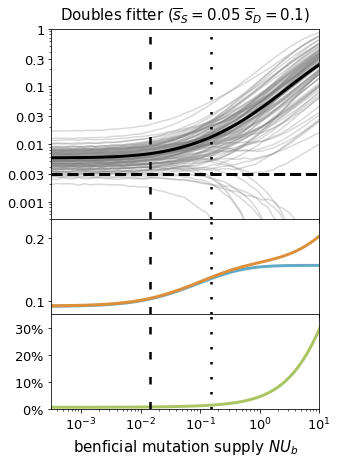

In [18]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.8, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1,1]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii > 500 and ii <=600:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)



axes[0].set_title('Doubles fitter ($\\overline{s}_S=0.05\,\,\overline{s}_D=0.1$)', fontsize=15,pad=8)

axes[0].set_ylim(0.0005,1)
axes[0].set_yscale("log")


axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3,1]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3,1], fontsize=13)



##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.08,0.23)

axes[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))


##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

axes[2].set_ylim(0.0,0.35)
axes[2].set_yticks([0.0,0.1, 0.2, 0.3])
axes[2].set_yticklabels(["$0 \\%$","$10 \\%$", "$20 \\%$", "$30 \\%$"], fontsize=13)




axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.5),10)
axes[2].set_xscale("log")


plt.tick_params(axis="x", labelsize=13) 


handles, labels = axes[0].get_legend_handles_labels()
for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

    
#plt.savefig("FD_W_12_sS005_sD01.pdf", bbox_inches='tight')

plt.show()

# ns=120, nd=200 with exponential distribution

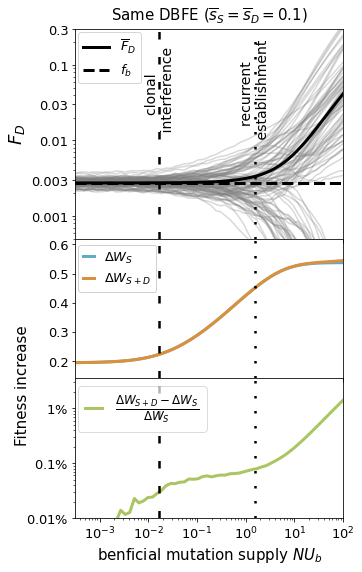

In [48]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.8, 9), sharex=True, gridspec_kw={'height_ratios': [1.5, 1.,1.]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii > 0 and ii <=100:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

# Add text at the vertical line
axes[0].text(np.real(epsilon/(4*lambertw(epsilon/(4*U))))+0.0006, 0.045, 'clonal \n interference', rotation=90, verticalalignment='center', horizontalalignment='center', multialignment='center', fontsize=14)

axes[0].text(np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))+0.005, 0.045, 'recurrent \n establishment', rotation=90, verticalalignment='center', horizontalalignment='center', multialignment='center', fontsize=14)


axes[0].set_ylabel('$F_D$', fontsize=18)

    
axes[0].set_title('Same DBFE ($\\overline{s}_S=\overline{s}_D=0.1$)', fontsize=15,pad=8)


axes[0].set_ylim(0.0005,0.3)
axes[0].set_yscale("log")


axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3], fontsize=13)

axes[0].legend(fontsize=13, loc=(0.01,0.74))


##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.14,0.62)


legend = axes[1].legend(handlelength=0.8, fontsize=13, loc=(0.01,0.62))
legend.get_frame().set_alpha(0.9)

##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

axes[2].set_ylim(0.0001,0.035)
axes[2].set_yscale("log")

axes[2].set_yticks([0.0001,0.001,0.01])
axes[2].set_yticklabels(["$0.01 \\%$","$0.1 \\%$","$1 \\%$"], fontsize=13)

legend = axes[2].legend(handlelength=1, fontsize=17, loc=(0.01,0.62))
legend.get_frame().set_alpha(0.7)



axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.5),100)
axes[2].set_xscale("log")

plt.xticks([10**(-3),10**(-2),10**(-1),1,10**(1),10**(2)], fontsize=13)


fig.text(-0.05, 0.33, 'Fitness increase', va='center', rotation='vertical', fontsize=15)


handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

    
#plt.savefig("FD_W_120_sigma01Log.pdf", bbox_inches='tight')

plt.show()

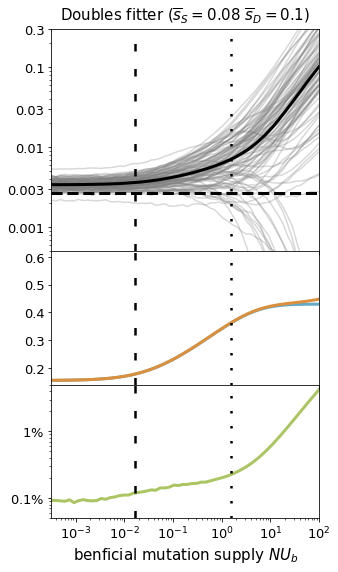

In [73]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.8, 9), sharex=True, gridspec_kw={'height_ratios': [2, 1.2,1.2]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii > 500 and ii <=600:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


 
    
axes[0].set_title('Doubles fitter ($\\overline{s}_S=0.08\,\,\overline{s}_D=0.1$)', fontsize=15,pad=8)


axes[0].set_ylim(0.0005,0.3)
axes[0].set_yscale("log")


axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3], fontsize=13)


##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.14,0.62)


##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

axes[2].set_ylim(0.0005,0.05)
axes[2].set_yscale("log")

axes[2].set_yticks([0.001,0.01])
axes[2].set_yticklabels(["$0.1 \\%$","$1 \\%$"], fontsize=13)



axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.5),100)
axes[2].set_xscale("log")


plt.xticks([10**(-3),10**(-2),10**(-1),1,10**(1),10**(2)], fontsize=13)


handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

    
#plt.savefig("FD_W_120_sS008_sD01Log.pdf", bbox_inches='tight')

plt.show()

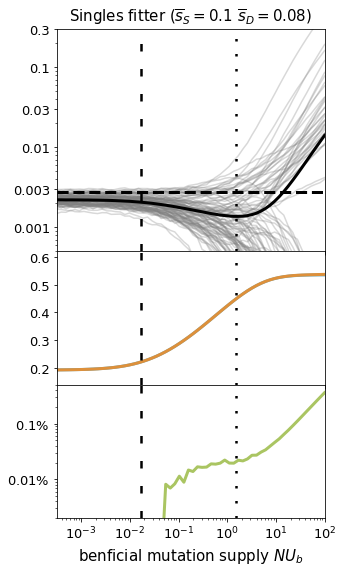

In [75]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.8, 9), sharex=True, gridspec_kw={'height_ratios': [2, 1.2,1.2]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii > 500 and ii <=600:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


    

    
axes[0].set_title('Singles fitter ($\\overline{s}_S=0.1\,\,\overline{s}_D=0.08$)', fontsize=15,pad=8)



axes[0].set_ylim(0.0005,0.3)
axes[0].set_yscale("log")


axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3], fontsize=13)


##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.14,0.62)


##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

#axes[2].set_ylim(-0.001,0.004)


axes[2].set_ylim(0.00002,0.005)
axes[2].set_yscale("log")

axes[2].set_yticks([0.0001,0.001])
axes[2].set_yticklabels(["$0.01 \\%$","$0.1 \\%$"], fontsize=13)



axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.5),100)

axes[2].set_xscale("log")


plt.xticks([10**(-3),10**(-2),10**(-1),1,10**(1),10**(2)], fontsize=13)


handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

    


plt.savefig("FD_W_120_sS01_sD008Log.pdf", bbox_inches='tight')

plt.show()
plt.close()

# ns=120, nd=200 with power law DFE (alpha=2.5)

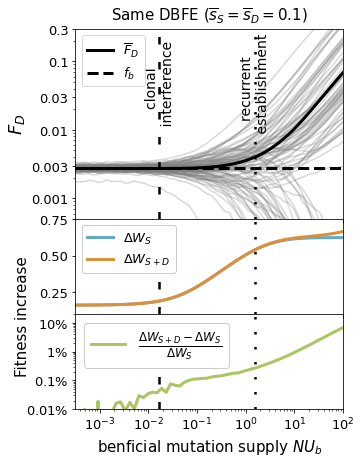

In [53]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.8, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1,1]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii > 0 and ii <=100:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

# Add text at the vertical line
axes[0].text(np.real(epsilon/(4*lambertw(epsilon/(4*U))))+0.0006, 0.045, 'clonal \n interference', rotation=90, verticalalignment='center', horizontalalignment='center', multialignment='center', fontsize=14)

axes[0].text(np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))+0.005, 0.045, 'recurrent \n establishment', rotation=90, verticalalignment='center', horizontalalignment='center', multialignment='center', fontsize=14)


axes[0].set_ylabel('$F_D$', fontsize=18)

    
axes[0].set_title('Same DBFE ($\\overline{s}_S=\overline{s}_D=0.1$)', fontsize=15,pad=8)


axes[0].set_ylim(0.0005,0.3)
axes[0].set_yscale("log")


axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3], fontsize=13)

axes[0].legend(fontsize=13)


##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.1,0.75)

legend = axes[1].legend(fontsize=13)
legend.get_frame().set_alpha(1)

##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

axes[2].set_ylim(0.0001,0.2)
axes[2].set_yscale("log")

axes[2].set_yticks([0.0001,0.001,0.01,0.1])
axes[2].set_yticklabels(["$0.01 \\%$","$0.1 \\%$","$1 \\%$","$10 \\%$"], fontsize=13)

legend = axes[2].legend(fontsize=17)
legend.get_frame().set_alpha(1)



axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.5),100)
axes[2].set_xscale("log")

plt.xticks([10**(-3),10**(-2),10**(-1),1,10**(1),10**(2)], fontsize=13)


fig.text(-0.05, 0.31, 'Fitness increase', va='center', rotation='vertical', fontsize=15)



handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

    
    

#plt.savefig("FD_W_120_sigma01LogPowerLaw25.pdf", bbox_inches='tight')

plt.show()

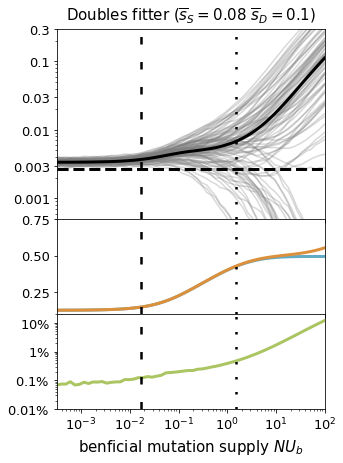

In [48]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.8, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1,1]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    if ii > 500 and ii <=600:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


   
axes[0].set_title('Doubles fitter ($\\overline{s}_S=0.08\,\,\overline{s}_D=0.1$)', fontsize=15,pad=8)


axes[0].set_ylim(0.0005,0.3)
axes[0].set_yscale("log")


axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3], fontsize=13)

##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.1,0.75)

##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)

axes[2].set_ylim(0.0001,0.2)
axes[2].set_yscale("log")

axes[2].set_yticks([0.0001,0.001,0.01,0.1])
axes[2].set_yticklabels(["$0.01 \\%$","$0.1 \\%$","$1 \\%$","$10 \\%$"], fontsize=13)


axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.5),100)
axes[2].set_xscale("log")


plt.xticks([10**(-3),10**(-2),10**(-1),1,10**(1),10**(2)], fontsize=13)


handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp


#plt.savefig("FD_W_120_sS008_sD01LogPowerLaw25.pdf", bbox_inches='tight')

plt.show()

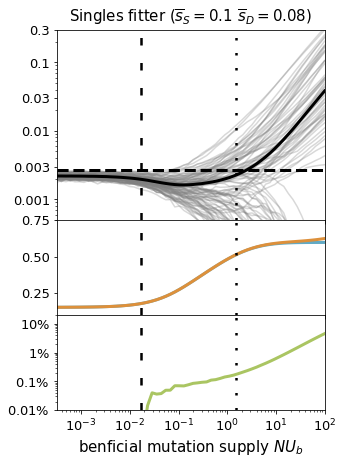

In [56]:
# Create two subplots sharing y axis
fig, axes = plt.subplots(3, figsize=(4.8, 7), sharex=True, gridspec_kw={'height_ratios': [2, 1,1]})#, hspace=0.2, wspace=0.2))

# Remove the margin between subplots
plt.subplots_adjust(hspace=0)

ii = 0
for r in ris:
    #axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    if ii > 500 and ii <=600:
        axes[0].plot(x,np.sum(r[:,ns+1:],axis = 1),color="grey",alpha=0.3)
    ii +=1

axes[0].plot(x,ris[:,:,ns+1:].sum(axis=2).mean(axis=0),color="black",linewidth=3, label="$\\overline{F}_{D}$")
axes[0].axhline([fraction_of_time_a_AAsub_only_due_to_doubles], linestyle="--", color="black",linewidth=3, label="$f_b$")

    
epsilon=1
axes[0].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[0].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


    
axes[0].set_title('Singles fitter ($\\overline{s}_S=0.1\,\,\overline{s}_D=0.08$)', fontsize=15,pad=8)



axes[0].set_ylim(0.0005,0.3)
axes[0].set_yscale("log")


axes[0].set_yticks([0.001,0.003,0.01,0.03,0.1,0.3]) 
axes[0].set_yticklabels([0.001,0.003,0.01,0.03,0.1,0.3], fontsize=13)


##############################################################################

axes[1].plot(x,ΔW_S, linewidth = 3, color="#62AAC5", label="$\Delta W_{S}$")
axes[1].plot(x,ΔW_SD, linewidth = 3, color = "#DD903B", label="$\Delta W_{S+D}$")

axes[1].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[1].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)


axes[1].tick_params(axis='y', labelsize=13)
axes[1].set_ylim(0.1,0.75)


##############################################################################
axes[2].plot(x,(ΔW_SD-ΔW_S)/ΔW_S, linewidth = 3, color = "#AAC562", label="$\\frac{\Delta W_{S+D}-\Delta W_{S}}{\Delta W_{S}}$")


axes[2].axvline([np.real(epsilon/(4*lambertw(epsilon/(4*U))))], linestyle=(0, (3, 7)), color="black",linewidth=2.5)
axes[2].axvline([np.real(epsilon*ns/(4*lambertw(epsilon/(4*mus/5.80))))], linestyle=(0, (1, 5)), color="black",linewidth=2.5)



axes[2].set_ylim(0.0001,0.2)
axes[2].set_yscale("log")

axes[2].set_yticks([0.0001,0.001,0.01,0.1])
axes[2].set_yticklabels(["$0.01 \\%$","$0.1 \\%$","$1 \\%$","$10 \\%$"], fontsize=13)




axes[2].set_xlabel('benficial mutation supply $NU_b$', fontsize=15)
axes[2].set_xlim(10**(-3.5),100)

axes[2].set_xscale("log")


plt.xticks([10**(-3),10**(-2),10**(-1),1,10**(1),10**(2)], fontsize=13)


handles, labels = axes[0].get_legend_handles_labels()

for ax in axes.flatten()[1:]:
    handles_temp, labels_temp = ax.get_legend_handles_labels()
    handles += handles_temp
    labels += labels_temp

    

#plt.savefig("FD_W_120_sS01_sD008LogPowerLaw25.pdf", bbox_inches='tight')

plt.show()

# Multiplot

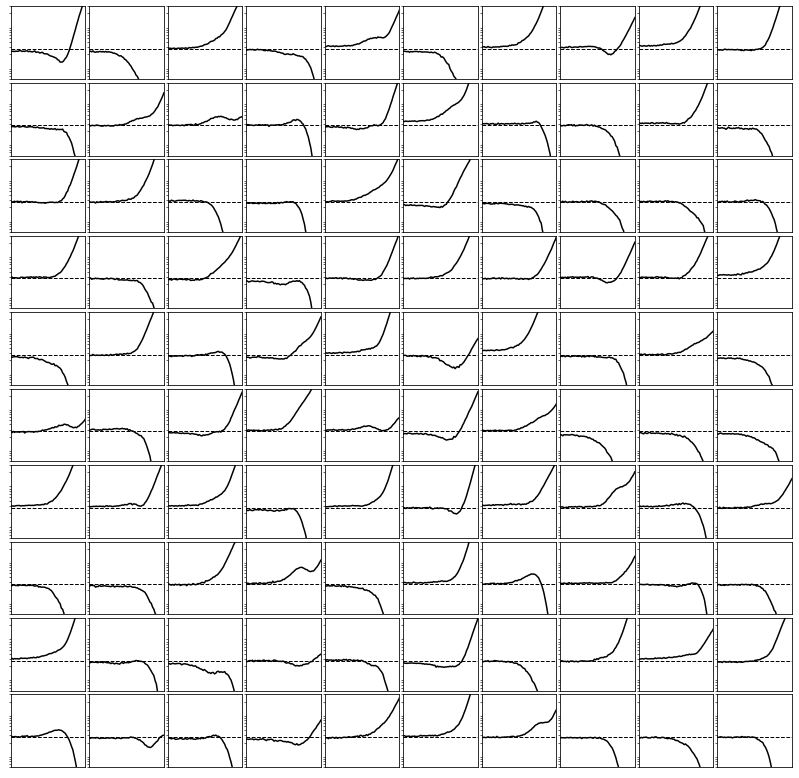

In [73]:
Nfigs = 10

fig, ax = plt.subplots(Nfigs, Nfigs, figsize=(14, 14))
#fig, ax = plt.subplots(Nfigs, Nfigs, figsize=(8, 8))

offset = 200
for i in range(Nfigs):
    for j in range(Nfigs):
        r = ris[offset+i+Nfigs*j]
        ax[i,j].plot(x,np.sum(r[:,ns+1:],axis = 1),color="black")
        ax[i,j].set_xscale("log")
        ax[i,j].set_yscale("log")
        #ax[i,j].set_ylim(0.0005,1)
        ax[i,j].set_ylim(0.0005,0.03)
        ax[i,j].set_xlim(10**(-3.5),10**(2.))
        ax[i,j].axhline([fractionAAlevel],linestyle="--", color="black",linewidth=1)

        
for a in ax.flatten():
    a.set_xticks([])     
    a.set_yticks([]) 

plt.subplots_adjust(wspace=.05, hspace=.05)


#plt.savefig("plotGrid.pdf")

In [41]:
def π(s):
    out = 1.0-np.exp(-2*s)
    out[out<0] = 0
    return out


def WM_model(fs, fd, mus, mud):
    fs = fs - 1   
    fd = fd - 1
    fs = fs[fs > 0]
    fd = fd[fd > 0]
    
    Ps = mus*π(fs)
    Pd = mud*π(fd)
    Z = Pd.sum() + Ps.sum()
    return Pd.sum()/Z

def CI_model(fs,fd,MS, mus,mud):
    out = []
    fs = fs - 1   
    fd = fd - 1
    
    fs = fs[fs > 0]
    fd = fd[fd > 0]
    
    ns = len(fs)
    nd = len(fd)
    for ms in MS:
        N = int(ms/U)
        Λs = N*np.log(N)/np.log(1+fs)
        Λd = N*np.log(N)/np.log(1+fd)
        
        for i in range(ns):
            Λs[i] *= (mus*np.sum(π(fs[fs>fs[i]])) + mud*np.sum(π(fd[fd>fs[i]])))
        for i in range(nd):
            Λd[i] *= (mus*np.sum(π(fs[fs>fd[i]])) + mud*np.sum(π(fd[fd>fd[i]])))
            
        Ps = π(fs)*np.exp(-Λs)*mus
        Pd = π(fd)*np.exp(-Λd)*mud
        
        Z = Ps.sum()+Pd.sum()      
        Pd /= Z
        out.append(Pd.sum())

    return out

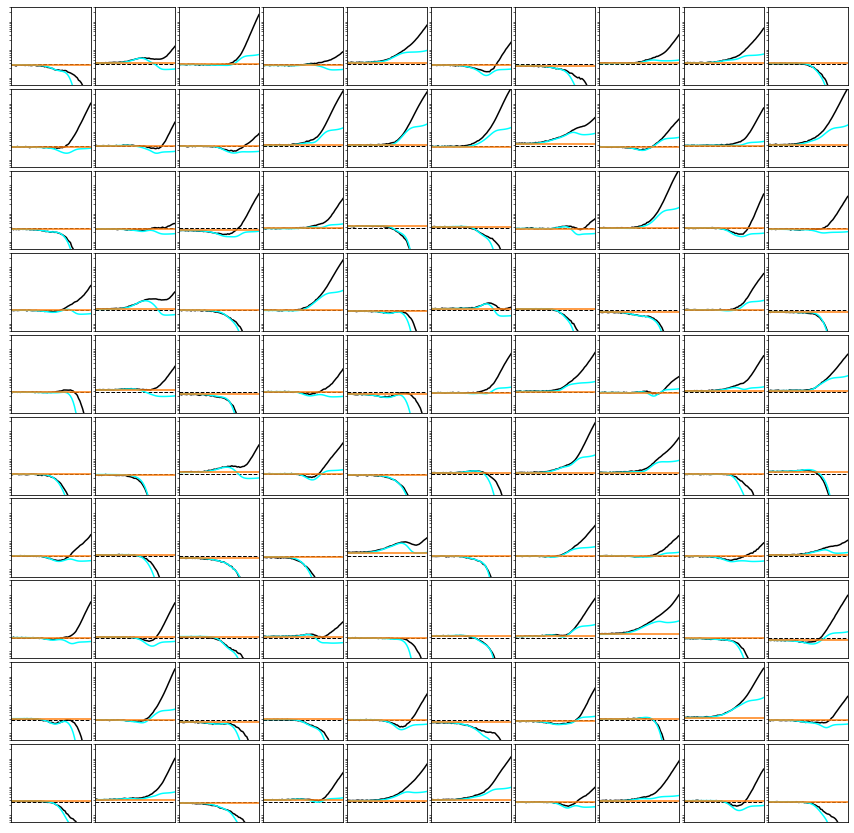

In [66]:
# amino acid level 

Nfigs = 10

fig, ax = plt.subplots(Nfigs, Nfigs, figsize=(15, 15))
#fig, ax = plt.subplots(Nfigs, Nfigs, figsize=(8, 8))

offset = 0

for i in range(Nfigs):
    for j in range(Nfigs):
        r = ris[offset+i+Nfigs*j]
        ax[i,j].plot(x,np.sum(r[:,ns+1:],axis = 1),color="black")
                
        ax[i,j].set_xscale("log")
        ax[i,j].set_yscale("log")
        ax[i,j].set_xlim(10**(-3),10**(1.))
        
        #ax[i,j].set_ylim(0.0005,1)
        ax[i,j].set_ylim(0.0005,0.3)
        ax[i,j].set_xlim(10**(-3.5),10**(2.))

        ax[i,j].axhline([fractionAAlevel],linestyle="--", color="black",linewidth=1)
        ftemp = f[offset+i+Nfigs*j]
        fs = ftemp[1:ns+1].copy()
        fd = ftemp[ns+1:].copy()
        ax[i,j].plot(x,CI_model(fs,fd,x, mus/5.80, mud/9.63),color="cyan",linewidth=1.5)
        ax[i,j].axhline(WM_model(fs,fd, mus/5.80, mud/9.63),color="C1",linewidth=1.5,label= "WM")

        
                
for a in ax.flatten():
    a.set_xticks([])     
    a.set_yticks([]) 

plt.subplots_adjust(wspace=.05, hspace=.05)

#plt.savefig("plotGridB.pdf")

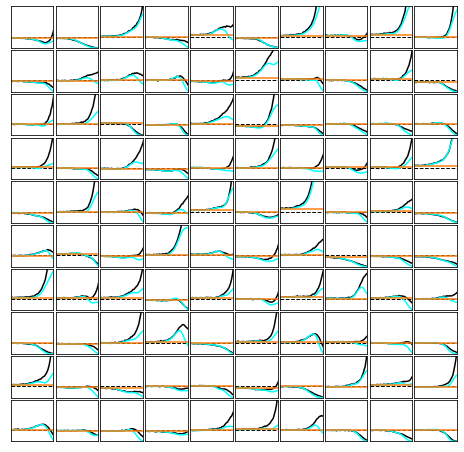

In [74]:
# amino acid level 

Nfigs = 10

#fig, ax = plt.subplots(Nfigs, Nfigs, figsize=(15, 15))
fig, ax = plt.subplots(Nfigs, Nfigs, figsize=(8, 8))

offset = 200

for i in range(Nfigs):
    for j in range(Nfigs):
        r = ris[offset+i+Nfigs*j]
        ax[i,j].plot(x,np.sum(r[:,ns+1:],axis = 1),color="black")
                
        ax[i,j].set_xscale("log")
        ax[i,j].set_ylim(0,0.01)
        ax[i,j].set_xlim(10**(-3),10**(1.))
        ax[i,j].axhline([fractionAAlevel],linestyle="--", color="black",linewidth=1)
        #ax[i,j].plot(x,CI_model(f[i+Nfigs*j],x),color="cyan",linewidth=3)
        ftemp = f[offset+i+Nfigs*j]
        fs = ftemp[1:ns+1].copy()
        fd = ftemp[ns+1:].copy()
        ax[i,j].plot(x,CI_model(fs,fd,x, mus/5.80, mud/9.63),color="cyan",linewidth=1.5)
        ax[i,j].axhline(WM_model(fs,fd, mus/5.80, mud/9.63),color="C1",linewidth=1.5,label= "WM")

          
                
for a in ax.flatten():
    a.set_xticks([])     
    a.set_yticks([]) 

#plt.subplots_adjust(wspace=.05, hspace=.05)
plt.subplots_adjust(wspace=.05, hspace=.05)

#plt.savefig("plotGridB.pdf")